In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

We will begin by loading and inspecting the temperature dataset.

In [2]:
df_temp = pd.read_csv('../data/NSW/temperature_nsw.csv', header=0, names=['LOCATION', 'DATETIME', 'TEMP'])

print('Temperature DataFrame','\n')
print(df_temp,'\n')

print('\n', 'Temperature Summary','\n')
print(df_temp.describe(),'\n')

print('\n', 'DataFrame Info', '\n')
print(df_temp.info())

Temperature DataFrame 

         LOCATION         DATETIME  TEMP
0       Bankstown    1/1/2010 0:00  23.1
1       Bankstown    1/1/2010 0:01  23.1
2       Bankstown    1/1/2010 0:30  22.9
3       Bankstown    1/1/2010 0:50  22.7
4       Bankstown    1/1/2010 1:00  22.6
...           ...              ...   ...
220321  Bankstown  17/3/2021 23:00  19.1
220322  Bankstown  17/3/2021 23:20  19.0
220323  Bankstown  17/3/2021 23:30  18.8
220324  Bankstown  17/3/2021 23:34  18.8
220325  Bankstown   18/3/2021 0:00  18.6

[220326 rows x 3 columns] 


 Temperature Summary 

                TEMP
count  220326.000000
mean       17.418827
std         5.849763
min        -1.300000
25%        13.400000
50%        17.700000
75%        21.300000
max        44.700000 


 DataFrame Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220326 entries, 0 to 220325
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   LOCATION  220326 non-null 

From the above output, we can see that the dataframe consists of three columns, with each row containing a temperature reading from a given location, date and time.

It appears that the entirety of this temperature data relates to the location of Bankstown, but it will be best to confirm this.

Looking at the datetime column, the data type is currently 'object' and should be converted to 'datetime' to allow for us to analyse the data by time period. It also appears that the dataframe is sorted from oldest to newest, with dates ranging from 01/01/2010 to 18/03/2021. Ideally, this should also be confirmed through further inspection.

Another observation of the datetime is that the intervals are inconsistent, with readings appearing to occur every half hour but also sporadically in between. It will be useful to identify if there are any duplicate records.

The temperature values appear to be sensible, with a minimum of -1.3째C and a maximum of 44.7째C. Furthermore, there are no null values in any of the three columns, so this portion of the data appears to be clean.

In [3]:
# Converting 'DATETIME' column to 'datetime' Dtype,
# with 'dayfirst' parameter ensuring that '02/01/2010' is treated as the '2nd of January 2010'
df_temp['DATETIME'] = pd.to_datetime(df_temp['DATETIME'], dayfirst=True)

print('Temperature DataFrame - Datetime Formatted','\n')
print(df_temp,'\n' * 2)

print('DataFrame Info', '\n')
print(df_temp.info(), '\n' * 2)

print('All Locations')
print(df_temp['LOCATION'].unique(), '\n' * 2)

print('Date Range')
print(df_temp['DATETIME'].min())
print(df_temp['DATETIME'].max(), '\n' * 2)

duplicates_temp = df_temp[df_temp.duplicated(subset='DATETIME', keep=False)]
print("Duplicates records:")
print(duplicates_temp, '\n')
print('Duplicate records to remove:', int(len(duplicates_temp)/2))

Temperature DataFrame - Datetime Formatted 

         LOCATION            DATETIME  TEMP
0       Bankstown 2010-01-01 00:00:00  23.1
1       Bankstown 2010-01-01 00:01:00  23.1
2       Bankstown 2010-01-01 00:30:00  22.9
3       Bankstown 2010-01-01 00:50:00  22.7
4       Bankstown 2010-01-01 01:00:00  22.6
...           ...                 ...   ...
220321  Bankstown 2021-03-17 23:00:00  19.1
220322  Bankstown 2021-03-17 23:20:00  19.0
220323  Bankstown 2021-03-17 23:30:00  18.8
220324  Bankstown 2021-03-17 23:34:00  18.8
220325  Bankstown 2021-03-18 00:00:00  18.6

[220326 rows x 3 columns] 


DataFrame Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220326 entries, 0 to 220325
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   LOCATION  220326 non-null  object        
 1   DATETIME  220326 non-null  datetime64[ns]
 2   TEMP      220326 non-null  float64       
dtypes: datetime64[ns](1), float64(

The above outputs confirm that the datetime column has been converted to datetime data type, and that all temperatures relate to Bankstown between the 1st of January 2010 and the 18th of March 2021.

It is also apparent that there are 13 rows where datetime has been duplicated. Given the temperature readings are the same for each duplicated pair, no decision needs to be made regarding aggregation or which records should be dropped.

We will now follow the same process for the demand dataset.

In [4]:
df_demand = pd.read_csv('../data/NSW/totaldemand_nsw - Copy.csv', header=0, names=['DATETIME', 'DEMAND', 'REGIONID'])

print('Demand DataFrame','\n')
print(df_demand,'\n')

print('\n', 'Demand Summary','\n')
print(df_demand.describe(),'\n')

print('\n', 'DataFrame Info', '\n')
print(df_demand.info())

Demand DataFrame 

               DATETIME   DEMAND REGIONID
0         1/1/2010 0:00  8038.00     NSW1
1         1/1/2010 0:30  7809.31     NSW1
2         1/1/2010 1:00  7483.69     NSW1
3         1/1/2010 1:30  7117.23     NSW1
4         1/1/2010 2:00  6812.03     NSW1
...                 ...      ...      ...
196508  17/3/2021 22:00  7419.77     NSW1
196509  17/3/2021 22:30  7417.91     NSW1
196510  17/3/2021 23:00  7287.32     NSW1
196511  17/3/2021 23:30  7172.39     NSW1
196512   18/3/2021 0:00  7094.51     NSW1

[196513 rows x 3 columns] 


 Demand Summary 

              DEMAND
count  196513.000000
mean     8113.145859
std      1299.532774
min      5074.630000
25%      7150.070000
50%      8053.230000
75%      8958.550000
max     14579.860000 


 DataFrame Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196513 entries, 0 to 196512
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DATETIME  196513 non-nul

The demand dataframe also consists of three columns, with each row containing an energy demand reading from a given region, date and time. According to the source of the data (AEMO), demand is measured in megawatts (MW). We also know from the data source the RegionID of 'NSW1' relates to the whole state of New South Wales.

As is the case with the raw temperature data, the demand datetime data type will need to be converted. The date range also appears to be the same, however there are fewer readings, as the intervals appear to be consistently 30 minutes with no readings in between. We will need to bear this in mind when merging these datasets.

Lastly, there are no null values in the demand dataframe for us to consider.

In [5]:
# Converting 'DATETIME' column to 'datetime' Dtype,
df_demand['DATETIME'] = pd.to_datetime(df_demand['DATETIME'], dayfirst=True)

print('Demand DataFrame - Datetime Formatted','\n')
print(df_demand,'\n' * 2)

print('All Regions')
print(df_demand['REGIONID'].unique(), '\n' * 2)

print('Date Range')
start_date = df_demand['DATETIME'].min()
print(start_date)
end_date = df_demand['DATETIME'].max()
print(end_date, '\n' * 2)

# Check that the 30 minute intervals are consistent throughout the entire dataframe
date_range = pd.date_range(start_date, end_date, freq='30T')
print('Number of rows given same date range and consistent 30min intervals:')
print(len(date_range), '\n' * 2)

# Check for duplicates
print('Number of duplicate records:', len(df_demand[df_demand.duplicated(subset='DATETIME')]), '\n' * 2)

print('DataFrame Info', '\n')
print(df_demand.info())

Demand DataFrame - Datetime Formatted 

                  DATETIME   DEMAND REGIONID
0      2010-01-01 00:00:00  8038.00     NSW1
1      2010-01-01 00:30:00  7809.31     NSW1
2      2010-01-01 01:00:00  7483.69     NSW1
3      2010-01-01 01:30:00  7117.23     NSW1
4      2010-01-01 02:00:00  6812.03     NSW1
...                    ...      ...      ...
196508 2021-03-17 22:00:00  7419.77     NSW1
196509 2021-03-17 22:30:00  7417.91     NSW1
196510 2021-03-17 23:00:00  7287.32     NSW1
196511 2021-03-17 23:30:00  7172.39     NSW1
196512 2021-03-18 00:00:00  7094.51     NSW1

[196513 rows x 3 columns] 


All Regions
['NSW1'] 


Date Range
2010-01-01 00:00:00
2021-03-18 00:00:00 


Number of rows given same date range and consistent 30min intervals:
196513 


Number of duplicate records: 0 


DataFrame Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196513 entries, 0 to 196512
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    ----------

The above outputs confirm that the datetime column has been converted to datetime data type, and that all demand readings relate to NSW between the 1st of January 2010 and the 18th of March 2021.

We can also conclude that the demand is consistently recorded every 30 minutes, with no readings occurring in between and no duplicate records.

Given the cleanliness of the demand data, with regular intervals and no missing values, we will keep these datetimes only when merging with the temperature data. However, prior to merging, we have to remove the duplicates from the temperature dataframe.

In [6]:
# Drop duplicate temperature records
df_temp = df_temp.drop_duplicates(subset='DATETIME')

# Take demand dataframe, and only add temperatures with matching datetimes
df_merge = df_demand.merge(df_temp, on='DATETIME', how='left')

print(df_merge, '\n')

print('Number of missing temperature readings:', df_merge['TEMP'].isnull().sum())

                  DATETIME   DEMAND REGIONID   LOCATION  TEMP
0      2010-01-01 00:00:00  8038.00     NSW1  Bankstown  23.1
1      2010-01-01 00:30:00  7809.31     NSW1  Bankstown  22.9
2      2010-01-01 01:00:00  7483.69     NSW1  Bankstown  22.6
3      2010-01-01 01:30:00  7117.23     NSW1  Bankstown  22.5
4      2010-01-01 02:00:00  6812.03     NSW1  Bankstown  22.5
...                    ...      ...      ...        ...   ...
196508 2021-03-17 22:00:00  7419.77     NSW1  Bankstown  19.7
196509 2021-03-17 22:30:00  7417.91     NSW1  Bankstown  19.5
196510 2021-03-17 23:00:00  7287.32     NSW1  Bankstown  19.1
196511 2021-03-17 23:30:00  7172.39     NSW1  Bankstown  18.8
196512 2021-03-18 00:00:00  7094.51     NSW1  Bankstown  18.6

[196513 rows x 5 columns] 

Number of missing temperature readings: 579


After merging the datasets, we have found that there are 579 missing temperature readings. While this is a relatively small amount given the size of the data, it would be best to see where these null values are distributed, in case there are any large blocks of time missing.

In [7]:
# Add date column, ignoring time of day
df_merge['DATE'] = df_merge['DATETIME'].dt.date

# Create dataframe with temperatures that are null only
df_null = df_merge[df_merge['TEMP'].isnull()]

# Return dates along with number of missing temperatures
nulls_per_day = df_null.groupby('DATE').size().sort_values(ascending=False)

# Show those only with more than two missing temperatures
print(nulls_per_day[nulls_per_day > 10])


DATE
2016-07-17    48
2016-07-16    48
2016-07-18    48
2016-03-11    23
2016-07-19    22
2010-12-20    22
2010-06-17    19
2010-05-21    19
2018-05-21    14
2016-07-15    14
2016-03-10    11
dtype: int64


We can see there are three days from the 16th - 18th of July 2016 where there are no temperature readings.

*Need to decided how to treat all of these nulls, whether to drop or to fill.*

*Need to inspect and merge population data*

*Need to inspect and merge meteorological data*

*Need to inspect and merge ENSO data - work in progress*

In [8]:
df_enso = pd.read_csv('../data/enso/daily_enso.csv', header=0, names=['DATE', 'SOI', 'SST_DIFF', 'ENSO'])

print('ENSO DataFrame','\n')
print(df_enso,'\n')

print('\n', 'SOI Summary','\n')
print(df_enso.describe(),'\n')

print('\n', 'DataFrame Info', '\n')
print(df_enso.info())

ENSO DataFrame 

            DATE    SOI  SST_DIFF  ENSO
0     2009-12-31  13.80  1.590000     0
1     2010-01-01  11.17  1.590000     0
2     2010-01-02   8.91  1.590000     0
3     2010-01-03   4.48  1.590000     0
4     2010-01-04  14.09  1.550000     0
...          ...    ...       ...   ...
5363  2024-09-06   1.84 -0.080000     0
5364  2024-09-07  -5.82 -0.080000     0
5365  2024-09-08  -7.25 -0.080000     0
5366  2024-09-09  -0.53 -0.047692     0
5367  2024-09-10   6.24 -0.050833     0

[5368 rows x 4 columns] 


 SOI Summary 

               SOI     SST_DIFF         ENSO
count  5368.000000  5367.000000  5368.000000
mean      1.447422    -0.019599    -0.064270
std      15.429190     0.909960     0.454124
min     -80.410000    -1.880000    -1.000000
25%      -7.840000    -0.680000     0.000000
50%       2.100000    -0.110000     0.000000
75%      11.960000     0.470000     0.000000
max      74.550000     2.770000     1.000000 


 DataFrame Info 

<class 'pandas.core.frame.DataFram

*Brief commentary on above, need to convert date Dtype to merge to main dataframe*

In [9]:
df_enso['DATETIME'] = pd.to_datetime(df_enso['DATE'], dayfirst=True)
df_enso.drop(columns=['DATE'], inplace=True)


df_merge = df_merge.merge(df_enso, on='DATETIME', how='left')


# As ENSO data is daily, will fill in the null values,
#so that every time period within the same has the same ENSO values
df_merge['SOI'] = df_merge.groupby('DATE')['SOI'].transform(lambda x: x.ffill())
df_merge['SST_DIFF'] = df_merge.groupby('DATE')['SST_DIFF'].transform(lambda x: x.ffill())
df_merge['ENSO'] = df_merge.groupby('DATE')['ENSO'].transform(lambda x: x.ffill())


print(df_merge)

                  DATETIME   DEMAND REGIONID   LOCATION  TEMP        DATE  \
0      2010-01-01 00:00:00  8038.00     NSW1  Bankstown  23.1  2010-01-01   
1      2010-01-01 00:30:00  7809.31     NSW1  Bankstown  22.9  2010-01-01   
2      2010-01-01 01:00:00  7483.69     NSW1  Bankstown  22.6  2010-01-01   
3      2010-01-01 01:30:00  7117.23     NSW1  Bankstown  22.5  2010-01-01   
4      2010-01-01 02:00:00  6812.03     NSW1  Bankstown  22.5  2010-01-01   
...                    ...      ...      ...        ...   ...         ...   
196508 2021-03-17 22:00:00  7419.77     NSW1  Bankstown  19.7  2021-03-17   
196509 2021-03-17 22:30:00  7417.91     NSW1  Bankstown  19.5  2021-03-17   
196510 2021-03-17 23:00:00  7287.32     NSW1  Bankstown  19.1  2021-03-17   
196511 2021-03-17 23:30:00  7172.39     NSW1  Bankstown  18.8  2021-03-17   
196512 2021-03-18 00:00:00  7094.51     NSW1  Bankstown  18.6  2021-03-18   

          SOI  SST_DIFF  ENSO  
0       11.17      1.59   0.0  
1       11.

*Brief rationale for adding columns for additional time periods*

In [10]:
# Adding columns to allow analysis of various time periods

df_merge['HOUR'] = df_merge['DATETIME'].dt.hour
df_merge['DAYOFWEEK'] = df_merge['DATETIME'].dt.weekday
df_merge['DAYOFMONTH'] = df_merge['DATETIME'].dt.day
df_merge['MONTH'] = df_merge['DATETIME'].dt.month
df_merge['YEAR'] = df_merge['DATETIME'].dt.year
df_merge['DAYOFYEAR'] = df_merge['DATETIME'].dt.dayofyear

print(df_merge)

                  DATETIME   DEMAND REGIONID   LOCATION  TEMP        DATE  \
0      2010-01-01 00:00:00  8038.00     NSW1  Bankstown  23.1  2010-01-01   
1      2010-01-01 00:30:00  7809.31     NSW1  Bankstown  22.9  2010-01-01   
2      2010-01-01 01:00:00  7483.69     NSW1  Bankstown  22.6  2010-01-01   
3      2010-01-01 01:30:00  7117.23     NSW1  Bankstown  22.5  2010-01-01   
4      2010-01-01 02:00:00  6812.03     NSW1  Bankstown  22.5  2010-01-01   
...                    ...      ...      ...        ...   ...         ...   
196508 2021-03-17 22:00:00  7419.77     NSW1  Bankstown  19.7  2021-03-17   
196509 2021-03-17 22:30:00  7417.91     NSW1  Bankstown  19.5  2021-03-17   
196510 2021-03-17 23:00:00  7287.32     NSW1  Bankstown  19.1  2021-03-17   
196511 2021-03-17 23:30:00  7172.39     NSW1  Bankstown  18.8  2021-03-17   
196512 2021-03-18 00:00:00  7094.51     NSW1  Bankstown  18.6  2021-03-18   

          SOI  SST_DIFF  ENSO  HOUR  DAYOFWEEK  DAYOFMONTH  MONTH  YEAR  \


*Brief rationale for adding columns for average demand and temp; ENSO data is likely daily* <br />
*Need to decide if also using other measures, e.g. max or mins*

In [11]:
# Adding columns for daily average demand and temp

df_merge['DAILY_AVG_DEMAND'] = df_merge.groupby('DATE')['DEMAND'].transform('mean')
df_merge['DAILY_AVG_TEMP'] = df_merge.groupby('DATE')['TEMP'].transform('mean')
print(df_merge)

                  DATETIME   DEMAND REGIONID   LOCATION  TEMP        DATE  \
0      2010-01-01 00:00:00  8038.00     NSW1  Bankstown  23.1  2010-01-01   
1      2010-01-01 00:30:00  7809.31     NSW1  Bankstown  22.9  2010-01-01   
2      2010-01-01 01:00:00  7483.69     NSW1  Bankstown  22.6  2010-01-01   
3      2010-01-01 01:30:00  7117.23     NSW1  Bankstown  22.5  2010-01-01   
4      2010-01-01 02:00:00  6812.03     NSW1  Bankstown  22.5  2010-01-01   
...                    ...      ...      ...        ...   ...         ...   
196508 2021-03-17 22:00:00  7419.77     NSW1  Bankstown  19.7  2021-03-17   
196509 2021-03-17 22:30:00  7417.91     NSW1  Bankstown  19.5  2021-03-17   
196510 2021-03-17 23:00:00  7287.32     NSW1  Bankstown  19.1  2021-03-17   
196511 2021-03-17 23:30:00  7172.39     NSW1  Bankstown  18.8  2021-03-17   
196512 2021-03-18 00:00:00  7094.51     NSW1  Bankstown  18.6  2021-03-18   

          SOI  SST_DIFF  ENSO  HOUR  DAYOFWEEK  DAYOFMONTH  MONTH  YEAR  \


*Moving on to EDA*

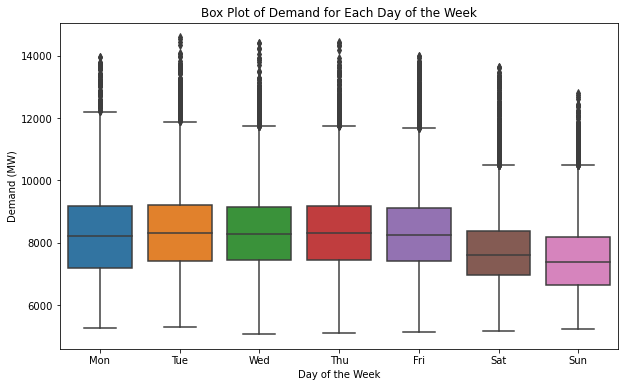

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DAYOFWEEK', y='DEMAND', data=df_merge)

plt.xlabel('Day of the Week')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Demand (MW)')
plt.title('Box Plot of Demand for Each Day of the Week')

plt.show()

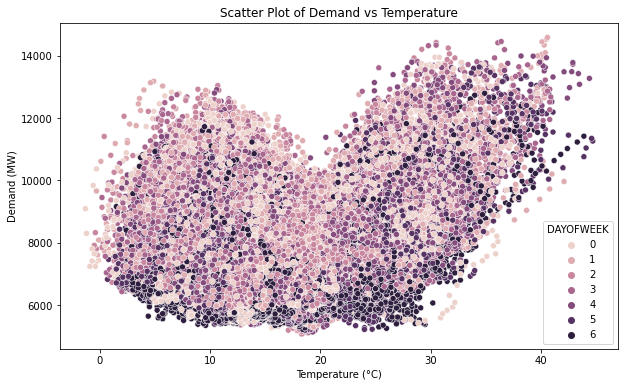

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TEMP', y='DEMAND', hue='DAYOFWEEK', data=df_merge)

plt.xlabel('Temperature (째C)')
plt.ylabel('Demand (MW)')
plt.title('Scatter Plot of Demand vs Temperature')

plt.show()

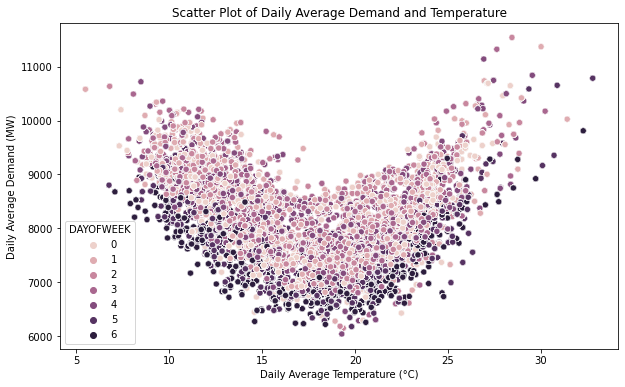

In [14]:
# Repeat above, but with average demand and temp
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DAILY_AVG_TEMP', y='DAILY_AVG_DEMAND', hue='DAYOFWEEK', data=df_merge)

plt.xlabel('Daily Average Temperature (째C)')
plt.ylabel('Daily Average Demand (MW)')
plt.title('Scatter Plot of Daily Average Demand and Temperature')

plt.show()

*Based on boxplot and scatter plot, day of the week is a significant predictor of demand. However, Mon-Fri appear similar so it may be worthwhile grouping these together as 'weekdays'.*

From Eugene's EDA:

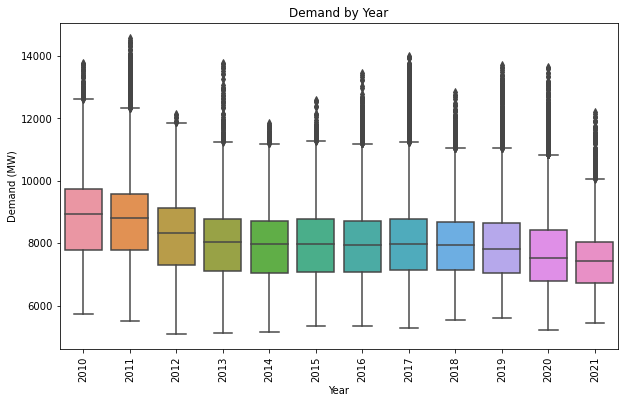

In [15]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_merge, x="YEAR", y="DEMAND")
plt.title("Demand by Year")
plt.xlabel("Year")
plt.ylabel("Demand (MW)")
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()


From Eugene's EDA

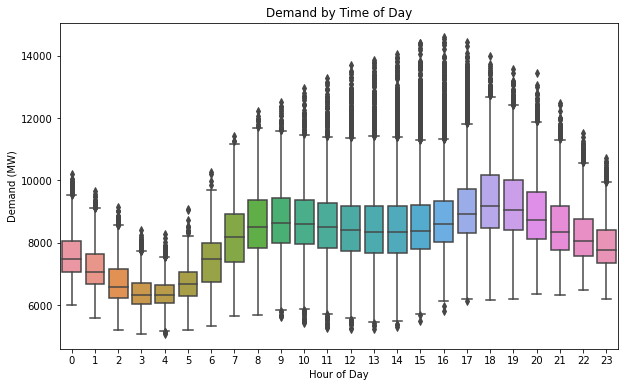

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_merge[df_merge["YEAR"] < 2021], x="HOUR", y="DEMAND")
plt.title("Demand by Time of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Demand (MW)")
plt.show()


From the above boxplots, we can see that eneregy demand is trending downwards from 2010 to 2021. Also evident is the variability in demand throughout an average day.

It would be interesting to observe the hourly demand, but with each year in isolation. From the below, we can see that the decrease in demand from year to year is most significant from around 8am to 1pm. However, in more recent years, we can see in the evenings that demand has generally been increasing from one year to the next. 

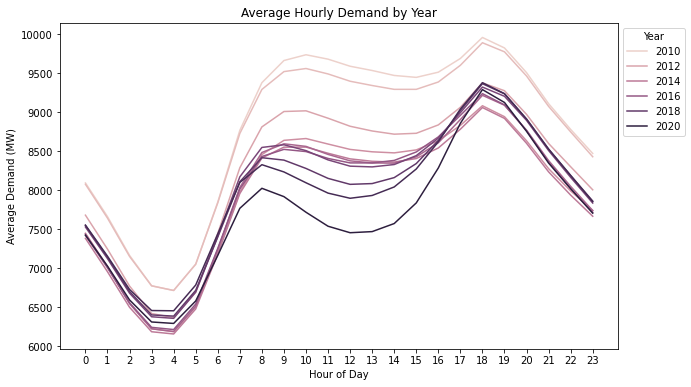

In [17]:
df_merge['HOURLY_AVG_DEMAND'] = df_merge.groupby(['YEAR', 'HOUR'])['DEMAND'].transform('mean')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_merge[df_merge["YEAR"] < 2021], x='HOUR', y='DEMAND', hue='YEAR', ci=None) # Need to customise palette for easier interpretation

plt.title('Average Hourly Demand by Year')
plt.xlabel('Hour of Day')
plt.ylabel('Average Demand (MW)')
plt.xticks(range(0, 24))
plt.legend(title='Year', bbox_to_anchor=(1, 1))
plt.show()
